TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

Overview

In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes.

Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).


Dataset

The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories.

Each row represents a blog post with the following columns:

•	Text: The content of the blog post. Column name: Data

•	Category: The category to which the blog post belongs. Column name: Labels


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
df = pd.read_csv('/content/blogs.csv')
df

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

1. Data Exploration and Preprocessing
   
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [3]:
df['Data'].value_counts()

Data
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc:84293 alt.religion.kibology:8356 alt.spam:30\nNewsgroups: talk.religion.misc,alt.religion.kibology,alt.spam\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!darwin.sura.net!sgiblab!cs.uoregon.edu!news.uoregon.edu!netnews.nwnet.net!news.u.washington.edu!ns1.nodak.edu!plains.NoDak.edu!cayley\nFrom: cayley@plains.NoDak.edu (Michele Cayley)\nSubject: Re: New Religion Forming -- Sign Up\nSender: usenet@ns1.nodak.edu (Usenet login)\nMessage-ID: <C62pCF.LFx@ns1.nodak.edu>\nDate: Mon, 26 Apr 1993 04:19:27 GMT\nReferences: <-g25zll@rpi.edu> <1993Apr26.004116.10087@monu6.cc.monash.edu.au>\nNntp-Posting-Host: plains.nodak.edu\nOrganization: North Dakota Higher Education Computing Network\nLines: 10\n\n\nrefrettably you are mistaken.  alt.drugs was used to recruit people for the\nworldwide pot religion.  I, however hve no problem being in both of them\n\n\n\nDeath to Dupont\nFree Bobby Fischer\nMichele Cayley is my mom, sue me not her\njohan engevik (drunken naked genius at large)\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [4]:
df['Data'].unique()

array(['Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainl

In [5]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64

In [6]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [7]:
df['Labels'].unique().shape

(20,)

In [8]:
df['length'] = df['Data'].apply(len)

In [9]:
# EDA Rename columns
df.rename(columns={'Labels':'class'},inplace=True)

In [10]:
df

Data               class  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

      length  
0       5972  
1       1336  
2       3116  
3      15910  
4       3264  
...      ...  
1995    5263  
1996    1771  
1997    2192  
1998    3197  
1999    4676  

[2000 rows x 3 columns]

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isna().sum()

Data      0
class     0
length    0
dtype: int64

In [13]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['class'])

In [14]:
df

Data               class  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

      length  label  
0       5972      0  
1       1336      0  
2       3116      0  
3      15910      0  
4       3264      0  
...      ...    ...  
1995    5263     19  
1996    1771     19  
1997    2192     19  
1998    3197     19  
1999    4676     19  

[2000 rows x 4 columns]

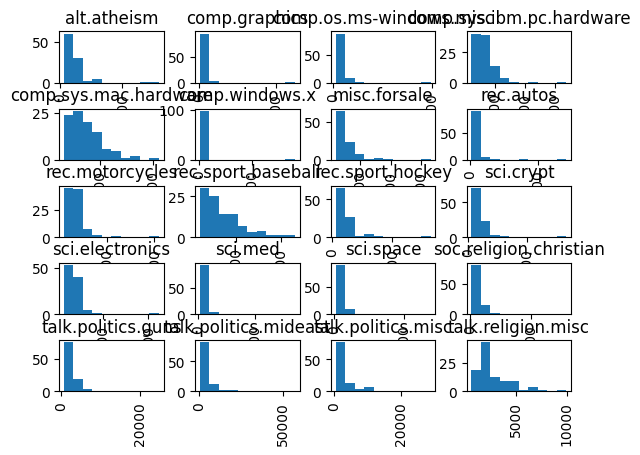

In [15]:
df.hist(column='length',by='class')
plt.show()

In [16]:
#alt.atheism(0)
#comp.graphics(1)
#talk.politics.misc(2)
#talk.politics.mideast(3)
#talk.politics.guns(4)
#soc.religion.christian(5)
#sci.space(6)
#sci.med(7)
#sci.electronics(8)
#sci.crypt(9)
#rec.sport.hockey(10)
#rec.sport.baseball(11)
#rec.motorcycles(12)
#rec.autos(13)
#misc.forsale(14)
#comp.windows.x(15)
#comp.sys.mac.hardware(16)
#comp.sys.ibm.pc.hardware(17)
#comp.os.ms-windows.misc(18)
#talk.religion.misc(19)

In [17]:
comp_graphic = df[df['label']==1]
alt_atheism = df[df['label']==0]
talk_politics_misc = df[df['label']==2]
talk_politics_mideast = df[df['label']==3]
talk_politics_guns = df[df['label']==4]
soc_religion_christian = df[df['label']==5]
sci_space = df[df['label']==6]
sci_med = df[df['label']==7]
sci_electronics = df[df['label']==8]
sci_crypt = df[df['label']==9]
rec_sport_hockey = df[df['label']==10]
rec_sport_baseball = df[df['label']==11]
rec_motorcycles = df[df['label']==12]
rec_autos = df[df['label']==13]
misc_forsale = df[df['label']==14]
comp_windows_x = df[df['label']==15]
comp_sys_mac_hardware = df[df['label']==16]
comp_sys_ibm_pc_hardware = df[df['label']==17]
comp_os_ms_windows_misc = df[df['label']==18]
talk_religion_misc= df[df['label']==19]

In [18]:
comp_graphic

Data          class  length  \
100  Newsgroups: comp.graphics\nPath: cantaloupe.sr...  comp.graphics    1123   
101  Newsgroups: comp.graphics\nPath: cantaloupe.sr...  comp.graphics    1385   
102  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  comp.graphics    1317   
103  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  comp.graphics     764   
104  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  comp.graphics     979   
..                                                 ...            ...     ...   
195  Path: cantaloupe.srv.cs.cmu.edu!rochester!corn...  comp.graphics    1077   
196  Xref: cantaloupe.srv.cs.cmu.edu comp.sys.sgi.m...  comp.graphics    1286   
197  Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:...  comp.graphics    2558   
198  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  comp.graphics     619   
199  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  comp.graphics    1315   

     label  
100      1  
101      1  
102      1  
103      1  
104      1  
..     ...  
195      1  
196      1  
197      1  
198      1  
199      1  

[100 rows x 4 columns]

In [19]:
alt_atheism

Data        class  length  \
0   Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism    5972   
1   Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism    1336   
2   Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism    3116   
3   Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   15910   
4   Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism    3264   
..                                                ...          ...     ...   
95  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism    1158   
96  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism    2733   
97  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  alt.atheism    1752   
98  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism    1469   
99  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism    2361   

    label  
0       0  
1       0  
2       0  
3       0  
4       0  
..    ...  
95      0  
96      0  
97      0  
98      0  
99      0  

[100 rows x 4 columns]

In [20]:
talk_politics_misc

Data  \
200  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...   
201  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
202  Xref: cantaloupe.srv.cs.cmu.edu comp.os.ms-win...   
203  Xref: cantaloupe.srv.cs.cmu.edu comp.os.ms-win...   
204  Newsgroups: comp.os.ms-windows.misc\nPath: can...   
..                                                 ...   
295  Newsgroups: comp.os.ms-windows.misc\nPath: can...   
296  Xref: cantaloupe.srv.cs.cmu.edu comp.periphs.p...   
297  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
298  Newsgroups: comp.os.ms-windows.misc\nPath: can...   
299  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   

                       class  length  label  
200  comp.os.ms-windows.misc    1798      2  
201  comp.os.ms-windows.misc    1252      2  
202  comp.os.ms-windows.misc     735      2  
203  comp.os.ms-windows.misc    2636      2  
204  comp.os.ms-windows.misc    2010      2  
..                       ...     ...    ...  
295  comp.os.ms-windows.misc    1750      2  
296  comp.os.ms-windows.misc    2282      2  
297  comp.os.ms-windows.misc    5855      2  
298  comp.os.ms-windows.misc    2854      2  
299  comp.os.ms-windows.misc    1170      2  

[100 rows x 4 columns]

In [21]:
talk_politics_mideast

Data  \
300  Newsgroups: comp.sys.ibm.pc.hardware\nPath: ca...   
301  Newsgroups: comp.sys.ibm.pc.hardware\nPath: ca...   
302  Newsgroups: comp.sys.ibm.pc.hardware\nPath: ca...   
303  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
304  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
..                                                 ...   
395  Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.p...   
396  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
397  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
398  From: swh@capella.cup.hp.com (Steve Harrold)\n...   
399  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   

                        class  length  label  
300  comp.sys.ibm.pc.hardware    1251      3  
301  comp.sys.ibm.pc.hardware     963      3  
302  comp.sys.ibm.pc.hardware    1154      3  
303  comp.sys.ibm.pc.hardware    1917      3  
304  comp.sys.ibm.pc.hardware    1780      3  
..                        ...     ...    ...  
395  comp.sys.ibm.pc.hardware    2473      3  
396  comp.sys.ibm.pc.hardware    1135      3  
397  comp.sys.ibm.pc.hardware    2006      3  
398  comp.sys.ibm.pc.hardware    1209      3  
399  comp.sys.ibm.pc.hardware    1780      3  

[100 rows x 4 columns]

In [22]:
talk_politics_guns

Data                  class  \
400  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  comp.sys.mac.hardware   
401  Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.h...  comp.sys.mac.hardware   
402  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  comp.sys.mac.hardware   
403  Newsgroups: comp.sys.mac.hardware\nPath: canta...  comp.sys.mac.hardware   
404  Xref: cantaloupe.srv.cs.cmu.edu comp.periphs.s...  comp.sys.mac.hardware   
..                                                 ...                    ...   
495  Newsgroups: comp.sys.mac.hardware\nPath: canta...  comp.sys.mac.hardware   
496  Newsgroups: comp.sys.mac.hardware\nPath: canta...  comp.sys.mac.hardware   
497  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  comp.sys.mac.hardware   
498  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  comp.sys.mac.hardware   
499  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  comp.sys.mac.hardware   

     length  label  
400    1742      4  
401    1352      4  
402    1314      4  
403    1171      4  
404    2861      4  
..      ...    ...  
495     802      4  
496    2091      4  
497    1780      4  
498    2621      4  
499    1301      4  

[100 rows x 4 columns]

In [23]:
soc_religion_christian

Data           class  \
500  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  comp.windows.x   
501  Newsgroups: comp.windows.x\nPath: cantaloupe.s...  comp.windows.x   
502  Newsgroups: comp.windows.x\nPath: cantaloupe.s...  comp.windows.x   
503  Newsgroups: comp.windows.x\nPath: cantaloupe.s...  comp.windows.x   
504  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  comp.windows.x   
..                                                 ...             ...   
595  Newsgroups: comp.windows.x\nPath: cantaloupe.s...  comp.windows.x   
596  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  comp.windows.x   
597  Xref: cantaloupe.srv.cs.cmu.edu comp.windows.x...  comp.windows.x   
598  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  comp.windows.x   
599  Newsgroups: comp.windows.x\nPath: cantaloupe.s...  comp.windows.x   

     length  label  
500    1516      5  
501    2971      5  
502    1685      5  
503    1140      5  
504     755      5  
..      ...    ...  
595    2006      5  
596    1284      5  
597    2621      5  
598    3028      5  
599     871      5  

[100 rows x 4 columns]

In [24]:
sci_space

Data         class  length  \
600  Newsgroups: misc.forsale,misc.forsale.computer...  misc.forsale    4127   
601  Xref: cantaloupe.srv.cs.cmu.edu misc.wanted:31...  misc.forsale     769   
602  Newsgroups: boulder.general,co.general,cu.gene...  misc.forsale    1868   
603  Xref: cantaloupe.srv.cs.cmu.edu misc.forsale:7...  misc.forsale    1046   
604  Xref: cantaloupe.srv.cs.cmu.edu rec.music.mark...  misc.forsale    1112   
..                                                 ...           ...     ...   
695  Newsgroups: misc.forsale\nPath: cantaloupe.srv...  misc.forsale     950   
696  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  misc.forsale     985   
697  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  misc.forsale    1218   
698  Newsgroups: misc.forsale\nPath: cantaloupe.srv...  misc.forsale    1655   
699  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  misc.forsale    1257   

     label  
600      6  
601      6  
602      6  
603      6  
604      6  
..     ...  
695      6  
696      6  
697      6  
698      6  
699      6  

[100 rows x 4 columns]

In [25]:
sci_med

Data      class  length  \
700  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.autos    1729   
701  Newsgroups: rec.autos\nPath: cantaloupe.srv.cs...  rec.autos    1616   
702  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.autos    1632   
703  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.autos     810   
704  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.autos    1748   
..                                                 ...        ...     ...   
795  Newsgroups: rec.autos\nPath: cantaloupe.srv.cs...  rec.autos    1848   
796  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  rec.autos     914   
797  Xref: cantaloupe.srv.cs.cmu.edu rec.autos:1027...  rec.autos    1565   
798  Newsgroups: rec.autos\nPath: cantaloupe.srv.cs...  rec.autos     797   
799  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  rec.autos    1672   

     label  
700      7  
701      7  
702      7  
703      7  
704      7  
..     ...  
795      7  
796      7  
797      7  
798      7  
799      7  

[100 rows x 4 columns]

In [26]:
sci_electronics

Data            class  \
800  Newsgroups: rec.motorcycles\nPath: cantaloupe....  rec.motorcycles   
801  Newsgroups: rec.motorcycles\nPath: cantaloupe....  rec.motorcycles   
802  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  rec.motorcycles   
803  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  rec.motorcycles   
804  Newsgroups: rec.motorcycles\nPath: cantaloupe....  rec.motorcycles   
..                                                 ...              ...   
895  Newsgroups: rec.motorcycles\nPath: cantaloupe....  rec.motorcycles   
896  Newsgroups: rec.motorcycles\nPath: cantaloupe....  rec.motorcycles   
897  Newsgroups: rec.motorcycles\nPath: cantaloupe....  rec.motorcycles   
898  Path: cantaloupe.srv.cs.cmu.edu!rochester!corn...  rec.motorcycles   
899  Xref: cantaloupe.srv.cs.cmu.edu rec.motorcycle...  rec.motorcycles   

     length  label  
800    1733      8  
801    1683      8  
802    1635      8  
803    1179      8  
804    1959      8  
..      ...    ...  
895    1796      8  
896    1340      8  
897    1712      8  
898    1267      8  
899    2387      8  

[100 rows x 4 columns]

In [27]:
sci_crypt

Data               class  \
900  Newsgroups: rec.sport.baseball\nPath: cantalou...  rec.sport.baseball   
901  Newsgroups: rec.sport.baseball\nPath: cantalou...  rec.sport.baseball   
902  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.sport.baseball   
903  Newsgroups: rec.sport.baseball\nPath: cantalou...  rec.sport.baseball   
904  Newsgroups: rec.sport.baseball\nPath: cantalou...  rec.sport.baseball   
..                                                 ...                 ...   
995  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  rec.sport.baseball   
996  Newsgroups: rec.sport.baseball\nPath: cantalou...  rec.sport.baseball   
997  Newsgroups: rec.sport.baseball\nPath: cantalou...  rec.sport.baseball   
998  Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ca...  rec.sport.baseball   
999  From: lynch@hpcc01.corp.hp.com (Howard Lynch)\...  rec.sport.baseball   

     length  label  
900    2395      9  
901    3797      9  
902    2691      9  
903     678      9  
904     878      9  
..      ...    ...  
995    1188      9  
996     760      9  
997    2770      9  
998    1526      9  
999     786      9  

[100 rows x 4 columns]

In [28]:
rec_sport_hockey

Data             class  \
1000  Newsgroups: rec.sport.hockey\nPath: cantaloupe...  rec.sport.hockey   
1001  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.sport.hockey   
1002  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  rec.sport.hockey   
1003  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  rec.sport.hockey   
1004  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.sport.hockey   
...                                                 ...               ...   
1095  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.sport.hockey   
1096  Newsgroups: rec.sport.hockey\nPath: cantaloupe...  rec.sport.hockey   
1097  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  rec.sport.hockey   
1098  Newsgroups: rec.sport.hockey\nPath: cantaloupe...  rec.sport.hockey   
1099  Newsgroups: rec.sport.hockey\nPath: cantaloupe...  rec.sport.hockey   

      length  label  
1000    4666     10  
1001    3660     10  
1002     953     10  
1003    2323     10  
1004    1322     10  
...      ...    ...  
1095    1328     10  
1096    1704     10  
1097     601     10  
1098    1727     10  
1099    2185     10  

[100 rows x 4 columns]

In [29]:
rec_sport_baseball

Data      class  length  \
1100  Xref: cantaloupe.srv.cs.cmu.edu comp.org.eff.t...  sci.crypt    2957   
1101  Newsgroups: sci.crypt\nPath: cantaloupe.srv.cs...  sci.crypt    5019   
1102  Newsgroups: sci.crypt\nPath: cantaloupe.srv.cs...  sci.crypt    2266   
1103  Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:1595...  sci.crypt    1365   
1104  Newsgroups: sci.crypt\nPath: cantaloupe.srv.cs...  sci.crypt    2818   
...                                                 ...        ...     ...   
1195  Xref: cantaloupe.srv.cs.cmu.edu comp.org.acm:1...  sci.crypt    2530   
1196  Xref: cantaloupe.srv.cs.cmu.edu sci.crypt:1568...  sci.crypt    1711   
1197  Newsgroups: sci.crypt\nPath: cantaloupe.srv.cs...  sci.crypt    2227   
1198  Xref: cantaloupe.srv.cs.cmu.edu alt.privacy:66...  sci.crypt    3751   
1199  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  sci.crypt    3326   

      label  
1100     11  
1101     11  
1102     11  
1103     11  
1104     11  
...     ...  
1195     11  
1196     11  
1197     11  
1198     11  
1199     11  

[100 rows x 4 columns]

In [30]:
rec_motorcycles

Data            class  \
1200  Newsgroups: sci.electronics\nPath: cantaloupe....  sci.electronics   
1201  Xref: cantaloupe.srv.cs.cmu.edu rec.audio.car:...  sci.electronics   
1202  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  sci.electronics   
1203  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  sci.electronics   
1204  Newsgroups: sci.electronics\nPath: cantaloupe....  sci.electronics   
...                                                 ...              ...   
1295  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...  sci.electronics   
1296  Xref: cantaloupe.srv.cs.cmu.edu comp.os.msdos....  sci.electronics   
1297  Newsgroups: sci.electronics\nPath: cantaloupe....  sci.electronics   
1298  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  sci.electronics   
1299  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  sci.electronics   

      length  label  
1200     762     12  
1201    2446     12  
1202     771     12  
1203    1985     12  
1204    1147     12  
...      ...    ...  
1295     971     12  
1296    2297     12  
1297     995     12  
1298    2218     12  
1299     968     12  

[100 rows x 4 columns]

In [32]:
rec_autos

Data    class  length  \
1300  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  sci.med     817   
1301  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  sci.med     534   
1302  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  sci.med     689   
1303  Xref: cantaloupe.srv.cs.cmu.edu sci.med:58963 ...  sci.med    3221   
1304  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  sci.med    1270   
...                                                 ...      ...     ...   
1395  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  sci.med    4660   
1396  Xref: cantaloupe.srv.cs.cmu.edu sci.energy:157...  sci.med    1117   
1397  Xref: cantaloupe.srv.cs.cmu.edu misc.health.al...  sci.med    1017   
1398  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  sci.med    2379   
1399  Newsgroups: sci.med\nPath: cantaloupe.srv.cs.c...  sci.med    1794   

      label  
1300     13  
1301     13  
1302     13  
1303     13  
1304     13  
...     ...  
1395     13  
1396     13  
1397     13  
1398     13  
1399     13  

[100 rows x 4 columns]

In [33]:
misc_forsale

Data      class  length  \
1400  Newsgroups: sci.space\nPath: cantaloupe.srv.cs...  sci.space    1743   
1401  Newsgroups: sci.space\nPath: cantaloupe.srv.cs...  sci.space    2350   
1402  Newsgroups: sci.space\nPath: cantaloupe.srv.cs...  sci.space    1462   
1403  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  sci.space     642   
1404  Newsgroups: sci.space\nPath: cantaloupe.srv.cs...  sci.space    1504   
...                                                 ...        ...     ...   
1495  Newsgroups: sci.space\nPath: cantaloupe.srv.cs...  sci.space    1173   
1496  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  sci.space     755   
1497  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  sci.space     584   
1498  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  sci.space    1684   
1499  Newsgroups: sci.space\nPath: cantaloupe.srv.cs...  sci.space     961   

      label  
1400     14  
1401     14  
1402     14  
1403     14  
1404     14  
...     ...  
1495     14  
1496     14  
1497     14  
1498     14  
1499     14  

[100 rows x 4 columns]

In [34]:
comp_windows_x

Data  \
1500  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
1501  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
1502  Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...   
1503  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
1504  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
...                                                 ...   
1595  Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...   
1596  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
1597  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
1598  Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...   
1599  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   

                       class  length  label  
1500  soc.religion.christian    2525     15  
1501  soc.religion.christian    3403     15  
1502  soc.religion.christian    1460     15  
1503  soc.religion.christian    5512     15  
1504  soc.religion.christian    1278     15  
...                      ...     ...    ...  
1595  soc.religion.christian    1627     15  
1596  soc.religion.christian   19042     15  
1597  soc.religion.christian     803     15  
1598  soc.religion.christian    2956     15  
1599  soc.religion.christian     592     15  

[100 rows x 4 columns]

In [35]:
comp_sys_mac_hardware

Data               class  \
1600  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....  talk.politics.guns   
1601  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....  talk.politics.guns   
1602  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  talk.politics.guns   
1603  From: mort@hpfcso.FC.HP.COM (Jeff Mortensen)\n...  talk.politics.guns   
1604  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....  talk.politics.guns   
...                                                 ...                 ...   
1695  Newsgroups: talk.politics.guns\nPath: cantalou...  talk.politics.guns   
1696  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  talk.politics.guns   
1697  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.politics.guns   
1698  Newsgroups: talk.politics.guns\nPath: cantalou...  talk.politics.guns   
1699  Newsgroups: talk.politics.guns\nPath: cantalou...  talk.politics.guns   

      length  label  
1600    2516     16  
1601    1824     16  
1602    4302     16  
1603    1112     16  
1604    2526     16  
...      ...    ...  
1695    1710     16  
1696    1488     16  
1697    2560     16  
1698    1624     16  
1699    1030     16  

[100 rows x 4 columns]

In [36]:
comp_sys_ibm_pc_hardware

Data  \
1700  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1701  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1702  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....   
1703  Xref: cantaloupe.srv.cs.cmu.edu soc.culture.je...   
1704  Xref: cantaloupe.srv.cs.cmu.edu soc.rights.hum...   
...                                                 ...   
1795  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1796  Xref: cantaloupe.srv.cs.cmu.edu soc.history:21...   
1797  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
1798  Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...   
1799  Newsgroups: talk.politics.mideast\nPath: canta...   

                      class  length  label  
1700  talk.politics.mideast     685     17  
1701  talk.politics.mideast    2751     17  
1702  talk.politics.mideast    8353     17  
1703  talk.politics.mideast    1418     17  
1704  talk.politics.mideast   21042     17  
...                     ...     ...    ...  
1795  talk.politics.mideast    3440     17  
1796  talk.politics.mideast    2810     17  
1797  talk.politics.mideast    4037     17  
1798  talk.politics.mideast    1638     17  
1799  talk.politics.mideast    2868     17  

[100 rows x 4 columns]

In [37]:
comp_os_ms_windows_misc

Data               class  \
1800  Xref: cantaloupe.srv.cs.cmu.edu alt.drugs:4483...  talk.politics.misc   
1801  Xref: cantaloupe.srv.cs.cmu.edu alt.fan.rush-l...  talk.politics.misc   
1802  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....  talk.politics.misc   
1803  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  talk.politics.misc   
1804  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....  talk.politics.misc   
...                                                 ...                 ...   
1895  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....  talk.politics.misc   
1896  Xref: cantaloupe.srv.cs.cmu.edu alt.fan.rush-l...  talk.politics.misc   
1897  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....  talk.politics.misc   
1898  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  talk.politics.misc   
1899  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....  talk.politics.misc   

      length  label  
1800    5166     18  
1801    1418     18  
1802    2030     18  
1803     565     18  
1804    1235     18  
...      ...    ...  
1895    1282     18  
1896   10918     18  
1897    1886     18  
1898    1342     18  
1899    2106     18  

[100 rows x 4 columns]

In [38]:
talk_religion_misc

Data               class  \
1900  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1901  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  talk.religion.misc   
1902  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1903  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1904  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

      length  label  
1900    4924     19  
1901    2045     19  
1902    2552     19  
1903    2848     19  
1904    1675     19  
...      ...    ...  
1995    5263     19  
1996    1771     19  
1997    2192     19  
1998    3197     19  
1999    4676     19  

[100 rows x 4 columns]

In [39]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [40]:
#User defined function for plotting wordcloud

def wordcld(data,title): # pass dataset and what title you want for the wordcloud
  txt = ' '.join(df['Data']) #join all sentences and convert it to paragraph
  txt = txt.lower() #normalization
  stop = STOPWORDS #stop will have entire list of stopwords

  wc = WordCloud(background_color='white').generate(txt)# inside generate()pass dataset for which you want to generate wordcloud
  plt.imshow(wc)
  plt.axis('off')# don't show numbers on x and y axis
  plt.title(title)
  #plt.show()

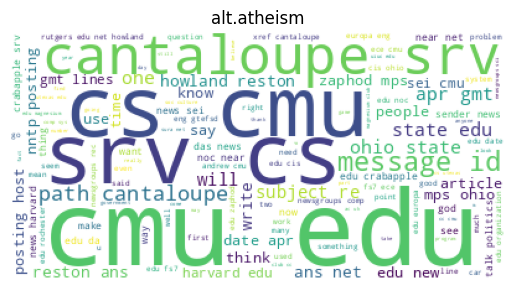

In [41]:
wordcld(alt_atheism,'alt.atheism')

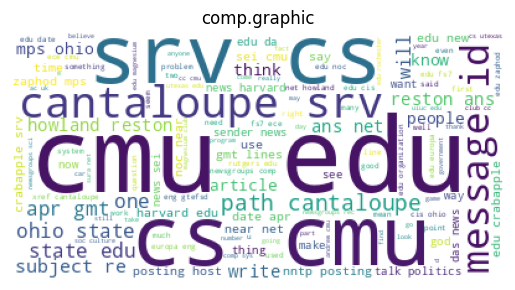

In [42]:
wordcld(comp_graphic,'comp.graphic')

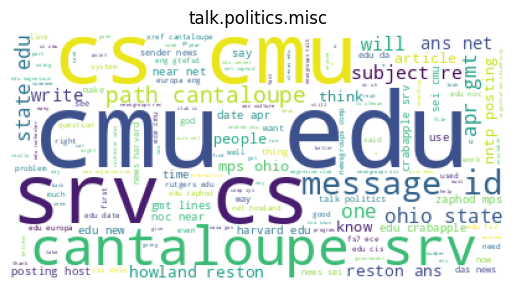

In [43]:
wordcld(talk_politics_misc,'talk.politics.misc')

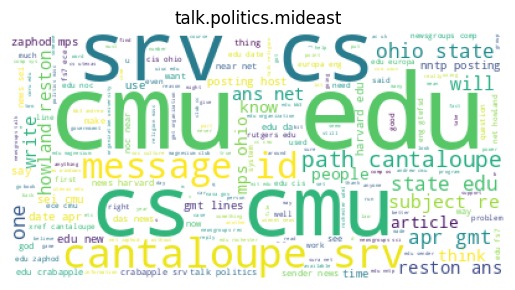

In [44]:
wordcld(talk_politics_mideast,'talk.politics.mideast')

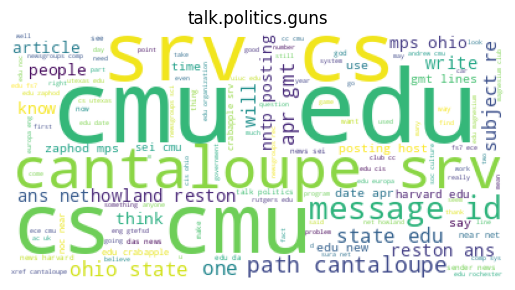

In [45]:
wordcld(talk_politics_guns,'talk.politics.guns')

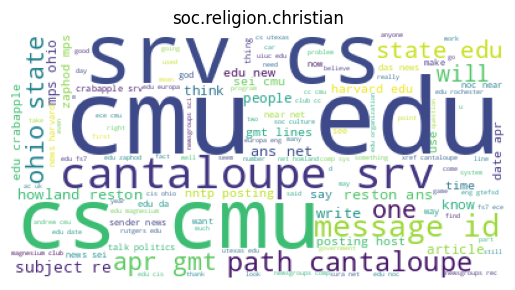

In [46]:
wordcld(soc_religion_christian,'soc.religion.christian')

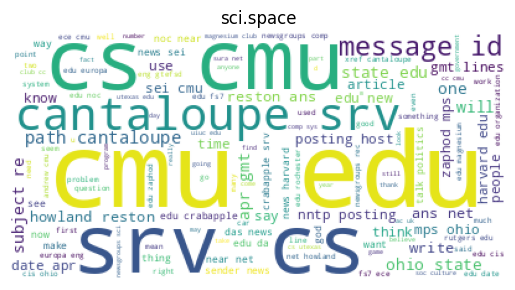

In [47]:
wordcld(sci_space,'sci.space')

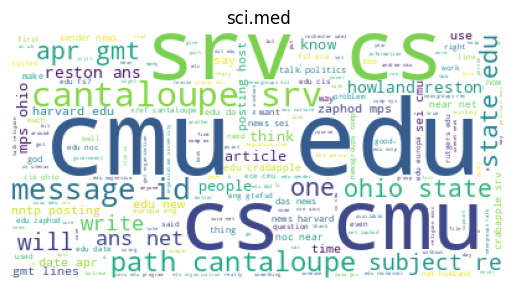

In [48]:
wordcld(sci_med,'sci.med')

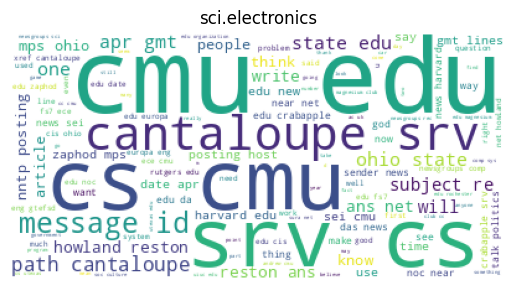

In [49]:
wordcld(sci_electronics,'sci.electronics')

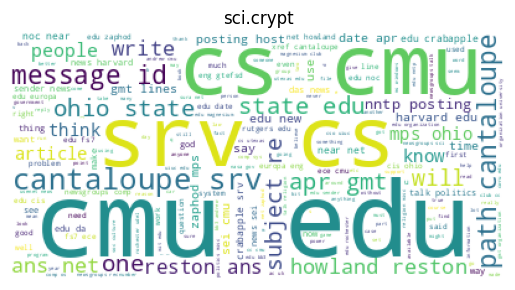

In [51]:
wordcld(sci_crypt,'sci.crypt')

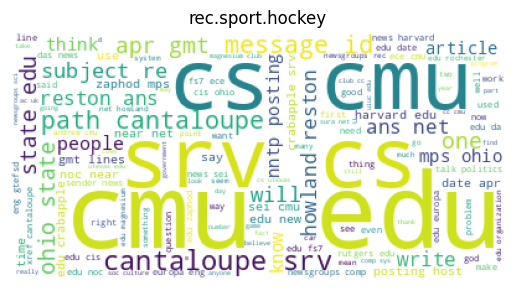

In [52]:
wordcld(rec_sport_hockey,'rec.sport.hockey')

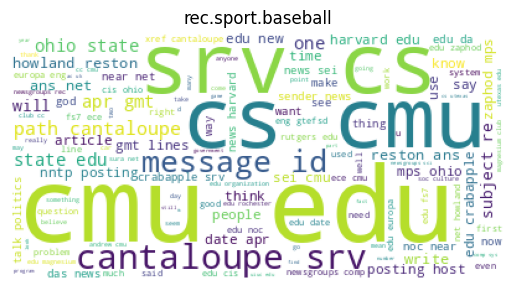

In [53]:
wordcld(rec_sport_baseball,'rec.sport.baseball')

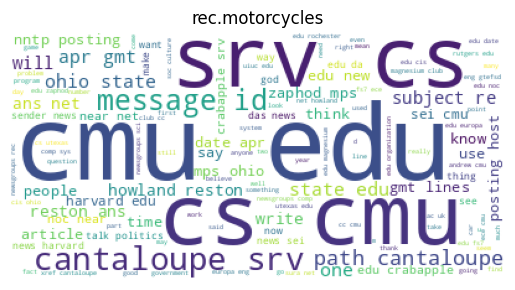

In [54]:
wordcld(rec_motorcycles,'rec.motorcycles')

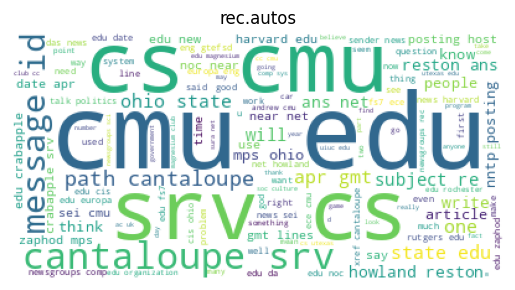

In [55]:
wordcld(rec_autos,'rec.autos')

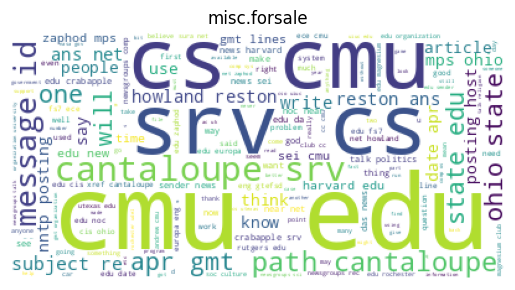

In [56]:
wordcld(misc_forsale,'misc.forsale')

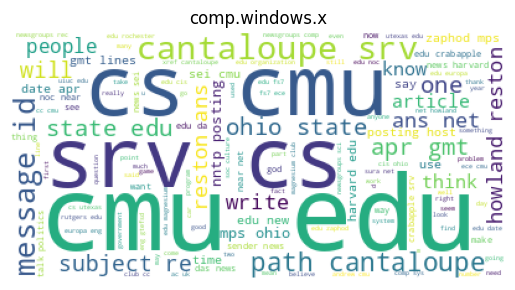

In [57]:
wordcld(comp_windows_x,'comp.windows.x')

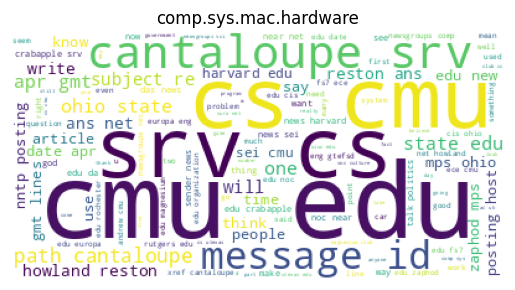

In [58]:
wordcld(comp_sys_mac_hardware,'comp.sys.mac.hardware')

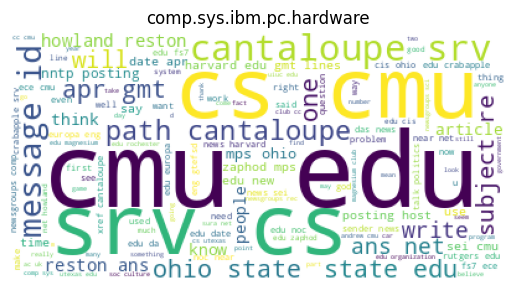

In [59]:
wordcld(comp_sys_ibm_pc_hardware,'comp.sys.ibm.pc.hardware')

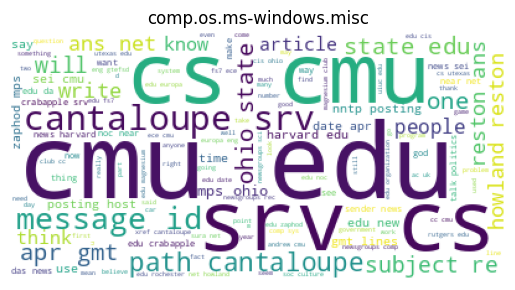

In [60]:
wordcld(comp_os_ms_windows_misc,'comp.os.ms-windows.misc')

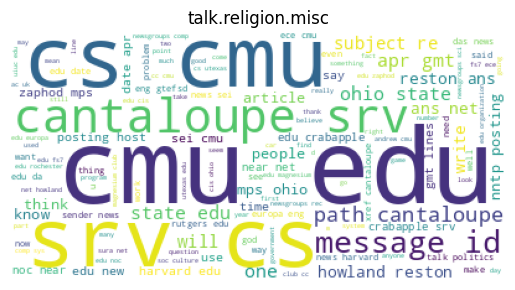

In [61]:
wordcld(talk_religion_misc,'talk.religion.misc')

In [64]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
# Function to clean the text
def clean_text(text):
    # Remove punctuations and numbers
    text = re.sub(f'[{re.escape(string.punctuation)}0-9]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join words back to a single string
    cleaned_text = ' '.join(words)
    return cleaned_text

In [72]:
import nltk

# Download the missing tokenizer
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [73]:
# Apply text cleaning to the 'Data' column
df['Cleaned_Data'] = df['Data'].apply(clean_text)


In [74]:
df

Data               class  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

      length  label                                       Cleaned_Data  
0       5972      0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1       1336      0  newsgroups altatheism path cantaloupesrvcscmue...  
2       3116      0  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3      15910      0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4       3264      0  xref cantaloupesrvcscmuedu altatheism talkreli...  
...      ...    ...                                                ...  
1995    5263     19  xref cantaloupesrvcscmuedu talkabortion altath...  
1996    1771     19  xref cantaloupesrvcscmuedu talkreligionmisc ta...  
1997    2192     19  xref cantaloupesrvcscmuedu talkorigins talkrel...  
1998    3197     19  xref cantaloupesrvcscmuedu talkreligionmisc al...  
1999    4676     19  xref cantaloupesrvcscmuedu sciskeptic talkpoli...  

[2000 rows x 5 columns]

In [75]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for performance
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Data'])

In [76]:
# Display the first few cleaned text entries and the shape of the TF-IDF matrix
cleaned_data_head = df[['Data', 'Cleaned_Data']].head()
tfidf_shape = X_tfidf.shape

In [77]:
cleaned_data_head, tfidf_shape

(                                                Data  \
 0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
 1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
 2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
 3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
 4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   
 
                                         Cleaned_Data  
 0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
 1  newsgroups altatheism path cantaloupesrvcscmue...  
 2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
 3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
 4  xref cantaloupesrvcscmuedu altatheism talkreli...  ,
 (2000, 5000))

In [78]:
df

Data               class  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

      length  label                                       Cleaned_Data  
0       5972      0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1       1336      0  newsgroups altatheism path cantaloupesrvcscmue...  
2       3116      0  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3      15910      0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4       3264      0  xref cantaloupesrvcscmuedu altatheism talkreli...  
...      ...    ...                                                ...  
1995    5263     19  xref cantaloupesrvcscmuedu talkabortion altath...  
1996    1771     19  xref cantaloupesrvcscmuedu talkreligionmisc ta...  
1997    2192     19  xref cantaloupesrvcscmuedu talkorigins talkrel...  
1998    3197     19  xref cantaloupesrvcscmuedu talkreligionmisc al...  
1999    4676     19  xref cantaloupesrvcscmuedu sciskeptic talkpoli...  

[2000 rows x 5 columns]

2. Naive Bayes Model for Text Classification
   
•	Split the data into training and test sets.

•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

•	Train the model on the training set and make predictions on the test set.


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['class'], test_size=0.2, random_state=42)


In [81]:
# Implementing the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [82]:
# Making predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [83]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [84]:
accuracy, classification_rep, confusion_mat

(0.8425,
 '                          precision    recall  f1-score   support\n\n             alt.atheism       0.50      0.83      0.62        18\n           comp.graphics       0.73      0.89      0.80        18\n comp.os.ms-windows.misc       0.91      0.95      0.93        22\ncomp.sys.ibm.pc.hardware       0.83      0.80      0.82        25\n   comp.sys.mac.hardware       0.86      0.90      0.88        21\n          comp.windows.x       0.95      0.84      0.89        25\n            misc.forsale       1.00      0.78      0.88        18\n               rec.autos       0.90      1.00      0.95        18\n         rec.motorcycles       1.00      0.94      0.97        16\n      rec.sport.baseball       0.84      0.89      0.86        18\n        rec.sport.hockey       0.88      1.00      0.94        15\n               sci.crypt       0.90      1.00      0.95        19\n         sci.electronics       0.67      0.75      0.71        16\n                 sci.med       0.88      0.88    

3. Sentiment Analysis
   
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

•	Examine the distribution of sentiments across different categories and summarize your findings.


In [85]:
!pip install textblob

In [86]:
from textblob import TextBlob
df['Sentiment'] = df['Cleaned_Data'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [87]:
def get_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [88]:
df['Sentiment_Label'] = df['Sentiment'].apply(get_sentiment)

In [89]:
sentiment_distribution = df.groupby('class')['Sentiment_Label'].value_counts(normalize=True)


4. Evaluation
   
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

•	Discuss the performance of the model and any challenges encountered during the classification process.

•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [90]:
accuracy = accuracy_score(y_test, y_pred)

In [91]:
classification_rep = classification_report(y_test, y_pred)

In [92]:
confusion_mat = confusion_matrix(y_test, y_pred)

In [93]:
accuracy

0.8425

In [94]:
classification_rep

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.50      0.83      0.62        18\n           comp.graphics       0.73      0.89      0.80        18\n comp.os.ms-windows.misc       0.91      0.95      0.93        22\ncomp.sys.ibm.pc.hardware       0.83      0.80      0.82        25\n   comp.sys.mac.hardware       0.86      0.90      0.88        21\n          comp.windows.x       0.95      0.84      0.89        25\n            misc.forsale       1.00      0.78      0.88        18\n               rec.autos       0.90      1.00      0.95        18\n         rec.motorcycles       1.00      0.94      0.97        16\n      rec.sport.baseball       0.84      0.89      0.86        18\n        rec.sport.hockey       0.88      1.00      0.94        15\n               sci.crypt       0.90      1.00      0.95        19\n         sci.electronics       0.67      0.75      0.71        16\n                 sci.med       0.88      0.88      0.88    

In [96]:
confusion_mat

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  2],
       [ 0, 16,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 21,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  1, 20,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1, 19,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  3,  0,  1,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0, 14,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  1,  0,  0,  1,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0